# Day 1
Z. Pace (29 Jan 2020)

## Agenda:
* int(eractive/roductory) statistics:
* python standard libraries: numpy.random, scipy.stats, statsmodels
* probability distribution zoo
* fitting a straight line to data, with a naive model and then a robust model

## References
* [Practical Statistics for Astronomers I](https://ned.ipac.caltech.edu/level5/Wall/frames.html)

## Motivation
Statistical inference allows us to estimate properties of a large sample given a smaller sample.

# Probability Distributions

A **probability distribution** is a mathematical construct describing the possible outcomes of an experiment, and how likely they are to arise after infinite experiments.

*Think of some basic experiments you could run using the things in front of you*

A probability distribution could be **discrete** or **continuous**: *what does this mean?*

**Continuous** distributions are differential quantities: for example, with an infintely-precise ruler, you can't measure that a table is exactly 3ft long

### Characterizing probability distributions
How do you describe probability distributions? Can you relate a given distribution to a sample of data?

We'll dip our toe into this before talking details. *Relate the accuracy with which you can measure the mean and standard deviation of the normal distribution to the number of samples you have from it*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

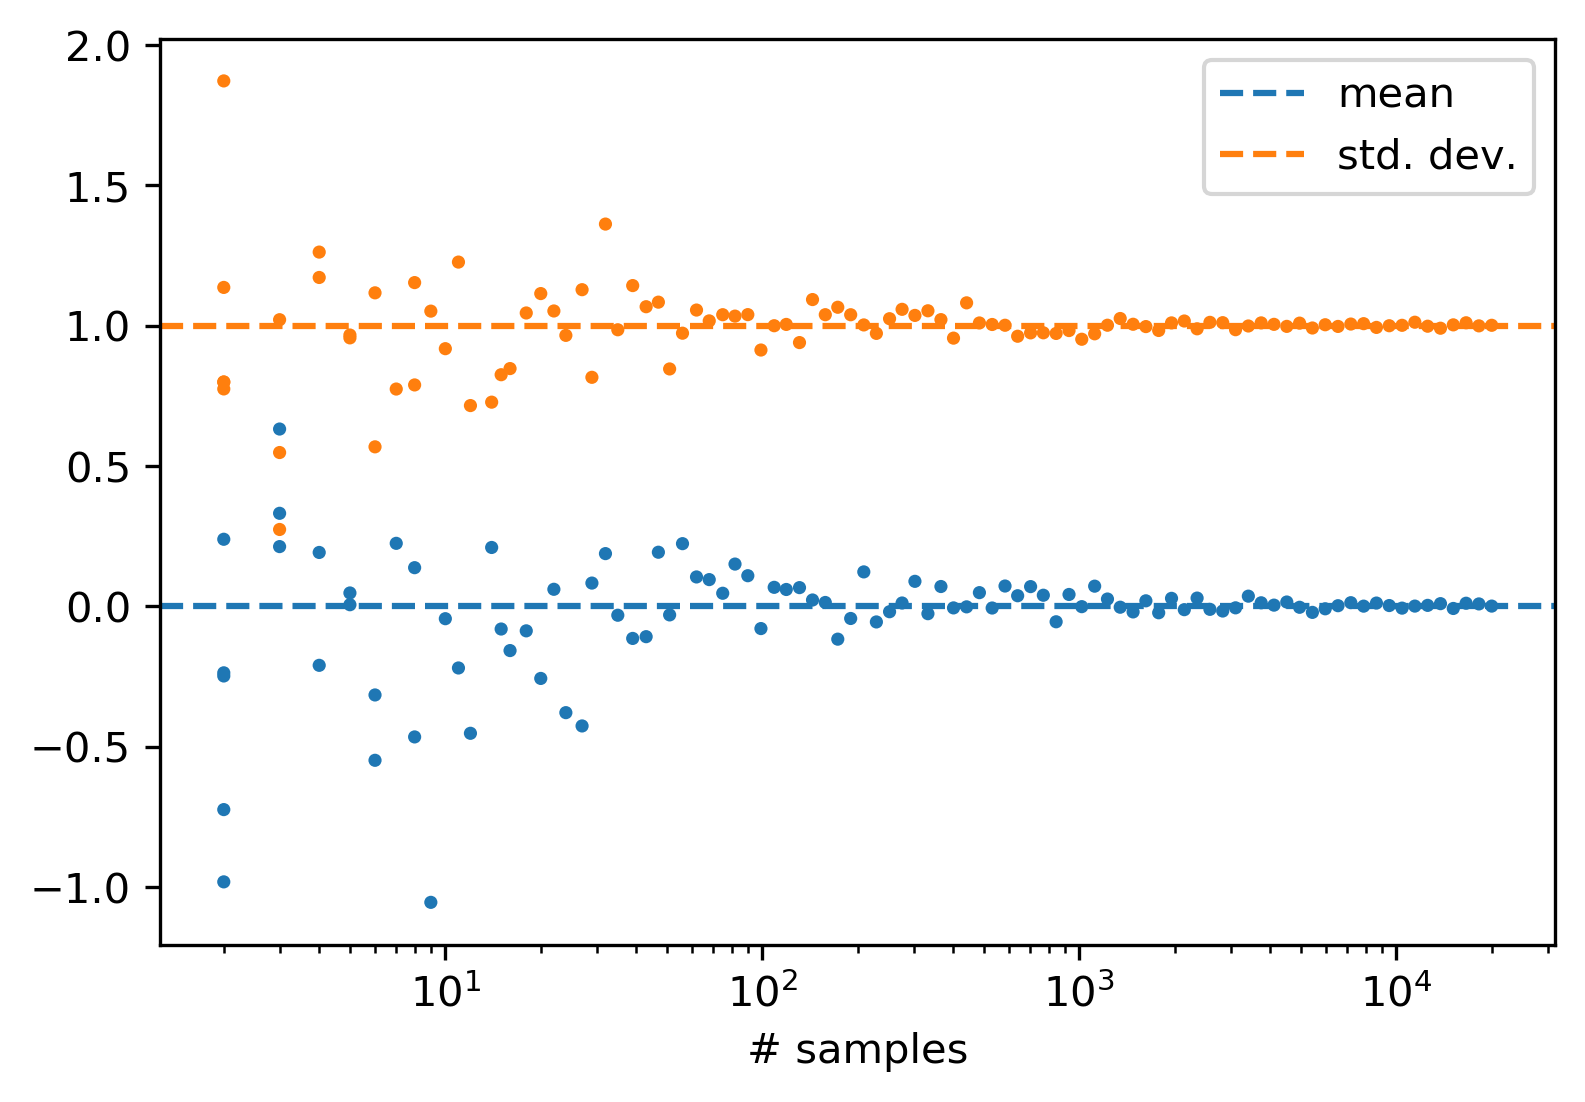

In [2]:
plt.figure(figsize=(6, 4), dpi=300)

μ_true, σ_true = 0., 1.

plt.axhline(μ_true, c='C0', linestyle='--', label='mean')
plt.axhline(σ_true, c='C1', linestyle='--', label='std. dev.')

for n_samples in np.geomspace(2, 20000, 100, dtype=int):
    samples = np.random.randn(n_samples)
    μ_meas, σ_meas = np.mean(samples), np.std(samples)
    plt.scatter([n_samples], [μ_meas], c='C0', s=10., edgecolor='None')
    plt.scatter([n_samples], [σ_meas], c='C1', s=10., edgecolor='None')
    
plt.legend()
    
plt.xscale('log')
plt.xlabel('# samples')
plt.show()

In the case of the normal distribution, typical summary-statistics of mean and standard-deviation are **actually how the distribution is parameterized**--so this is easy

Probability distributions are an important component of a **model**, which is a mathematical description of how to *generate* observations. I and others like to call it a **generative model** to remind ourselves that our model should do more than just describe the observations.

### Marginal vs conditional probability

Imagine some you have some bivariate-normal-distributed probability $p(X) = \mathfrak{N}(0, \Sigma)$

In [3]:
from sklearn.datasets import make_spd_matrix # this is an awesome function: make symmetric pos-def matrix (covariance!)
from scipy import stats

In [4]:
mvn_m, mvn_sig = np.zeros(2), make_spd_matrix(2)
print(mvn_sig)

[[1.93724642 0.79412855]
 [0.79412855 0.69673895]]


Text(0, 0.5, '$X_1$')

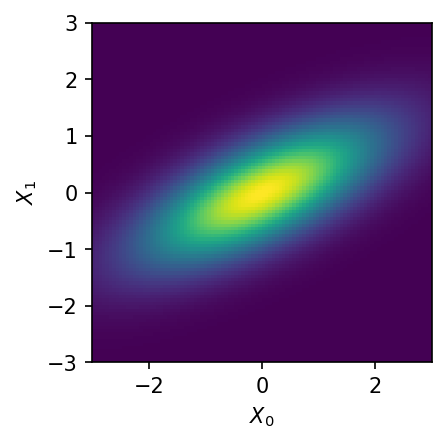

In [5]:
xge, yge = np.linspace(-3., 3., 101), np.linspace(-3., 3., 101)
xgc, ygc = 0.5 * (xge[:-1] + xge[1:]), 0.5 * (yge[:-1] + yge[1:])
XXe, YYe = XYe = np.meshgrid(xge, yge, indexing='xy')
XXc, YYc = XYc = np.meshgrid(xgc, ygc, indexing='xy')

mvn_pdf = stats.multivariate_normal.pdf(
    x=np.column_stack([a.flatten() for a in XYc]), mean=mvn_m, cov=mvn_sig).reshape(XXc.shape)

plt.figure(figsize=(3, 3), dpi=150)
plt.pcolormesh(XXe, YYe, mvn_pdf)
plt.gca().set_aspect('equal')
plt.xlabel(r'$X_0$')
plt.ylabel(r'$X_1$')

**Marginal probability** is the probability of some event occuring *irrespective* of the outcome of other events

<ipython-input-6-9ebeb983ab53>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


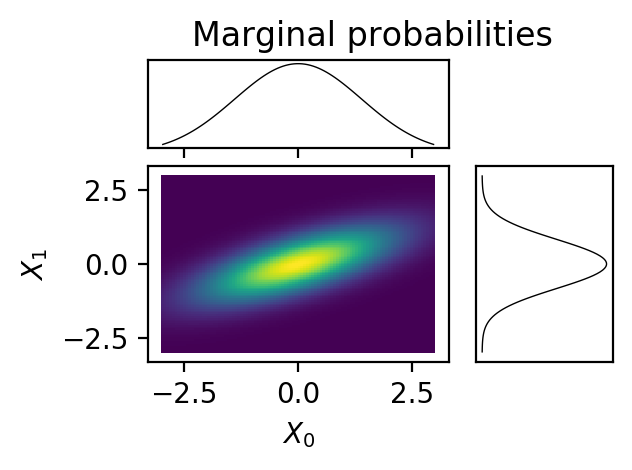

In [6]:
fig = plt.figure(figsize=(3, 2), dpi=200)
ax = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
axv = plt.subplot2grid((3, 3), (0, 0), colspan=2, sharex=ax)
axh = plt.subplot2grid((3, 3), (1, 2), rowspan=2, sharey=ax)

ax.pcolormesh(XXe, YYe, mvn_pdf)

axv.plot(xgc, mvn_pdf.sum(axis=0), c='k', linewidth=0.5)
axh.plot(mvn_pdf.sum(axis=1), ygc, c='k', linewidth=0.5)

axv.tick_params(left=False, labelleft=False, labelbottom=False)
axh.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False)

ax.set_xlabel(r'$X_0$')
ax.set_ylabel(r'$X_1$')

fig.suptitle('Marginal probabilities')

fig.show()

Whereas, **conditional probability** is a construct based on some additional knowledge. Let's say we know that $X_1$ lies in the interval $1 \pm da$. We can express this as $p(X|X_0 \sim \mathfrak{U}(1, 1 + da))$.

Literally: "probability of $X$ given that $X_0$ is drawn from this particular uniform distribution."

In [7]:
unif_pdf = stats.uniform.pdf(x=XXc.flatten(), loc=1., scale=0.25).reshape(XXc.shape)

<ipython-input-8-e6a424ee50f1>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


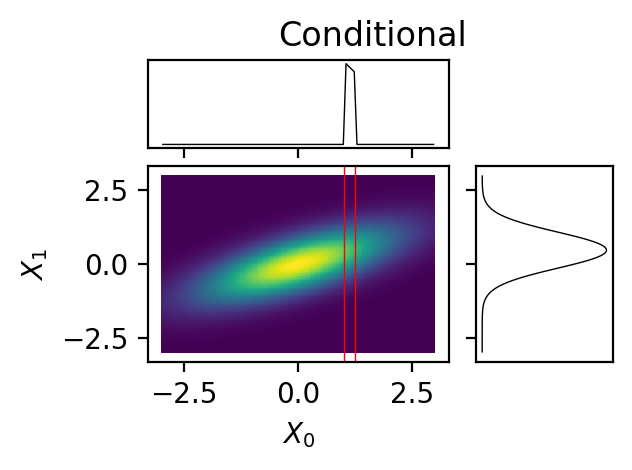

In [8]:
fig = plt.figure(figsize=(3, 2), dpi=200)
ax = plt.subplot2grid((3, 3), (1, 0), colspan=2, rowspan=2)
axv = plt.subplot2grid((3, 3), (0, 0), colspan=2, sharex=ax)
axh = plt.subplot2grid((3, 3), (1, 2), rowspan=2, sharey=ax)

ax.pcolormesh(XXe, YYe, mvn_pdf)
ax.axvline(1, linewidth=0.5, c='r')
ax.axvline(1 + 0.25, linewidth=0.5, c='r')

axv.plot(xgc, (mvn_pdf * unif_pdf).sum(axis=0), c='k', linewidth=0.5)
axh.plot((mvn_pdf * unif_pdf).sum(axis=1), ygc, c='k', linewidth=0.5)

axv.tick_params(left=False, labelleft=False, labelbottom=False)
axh.tick_params(labelleft=False, labelbottom=False, bottom=False)

ax.set_xlabel(r'$X_0$')
ax.set_ylabel(r'$X_1$')

fig.suptitle('Conditional')

fig.show()

### Statistical Moments, Covariance, and Correlation

Mean and variance are **moments**.

Mean ("expected"/"expectation" value):

* ${\rm E}(X) = \int_X x ~ p(x) ~ dx$
* ${\rm E}(f(X)) = \int_X f(x) ~ p(x) ~ dx$

Variance

* ${\rm Var}(X) = {\rm E}([X - {\rm E}(X)]^2)$

In general... a noncentral moment of order $r$ is notated and defined as

$\mu_r(X) = {\rm E}(X^r)$

and a central moment of order $r$ as

$\tilde{\mu_r}(X) = {\rm E}([X - {\rm E}(X)]^r)$

Covariance and correlation are defined as follows:

$$ {\rm Cov}(X, Y) = {\rm E}(X - {\rm E}(X)) \times {\rm E}(Y - {\rm E}(Y)) $$

$$ {\rm Corr}(X, Y) = \frac{{\rm Cov}(X, Y)}{\sqrt{{{\rm Var}(X)} {{\rm Var}(Y)}}} $$

![Probability distributions from Wall](wall_prob_dists.png)

Image: Probability distributions from Wall

See also LSST DSFP: Session 1, Day 2, *Intro to Statistics* (Süveges), for some more detail

### The Q-Q plot

The **quantile-quantile** or Q-Q plot consists of pairs $\{ \Phi^{-1}(\frac{j}{n + 1}), Y_j \}$, where $\Phi^{-1}(\frac{j}{n + 1})$ is the inverse of the standard normal distribution (usually), and $Y_j$ is the ordered sample.

*How could you use a Q-Q plot to evaluate a model's appropriateness to some data?*

Q-Q plots are very useful in identifying models affected strongly by outliers.

In general, $\Phi^{-1}$ is the CDF of your uncertainty model, so it could be Poisson-, Gamma- or distributed in a different way.

The Q-Q plot is evidently also used in the **method of moments**, which is a way of estimating the underlying characteristics of an assumed family of distributions (e.g., Normal). Commonly, you assume a distribution $F(x; \theta)$ and use quantile estimators (e.g., median absolute deviation, or "MAD") as estimators of the moments. This generalizes to **L-estimators**. An alternative is to define a loss function and minimize its sum over the sample (generalizes to **M-estimators**).

You can find lots of this stuff in the `statsmodels` package

### Name! That! Distribution!

I'll give you some samples, and you try to figure out what their underlying distribution is! Use `.fit` method in `scipy.stats` distributions to figure this out.

In [9]:
from sampledata import data1, data2, data3

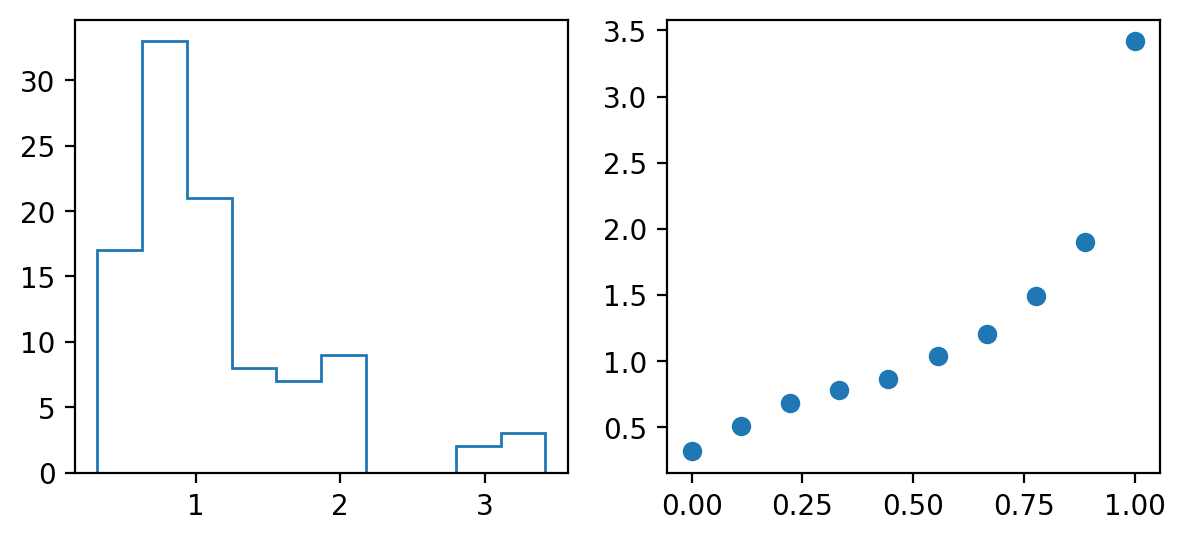

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 3), dpi=200)
axs[0].hist(data1, bins='auto', histtype='step')
qtls = np.linspace(0., 1., 10)
axs[1].scatter(qtls, np.quantile(data1, qtls))

### Simpson's Paradox

Sometimes, aggregate trends don't act the same as trends within subpopulations.

*Try to come up with an example dataset consisting of two sub-populations, where $x \propto y$ within each subpopulation, but $x \propto 1/y$ in aggregate.*

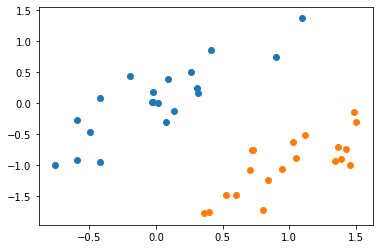

In [11]:
simpson_data1 = np.random.multivariate_normal(np.zeros(2), np.array([[0.2, 0.15], [0.15, 0.2]]), size=20)
simpson_data2 = np.random.multivariate_normal(np.array([1., -1.]), np.array([[0.2, 0.15], [0.15, 0.2]]), size=20)

plt.scatter(*simpson_data1.T)
plt.scatter(*simpson_data2.T)

In [12]:
np.cov(simpson_data1.T), np.cov(simpson_data2.T), np.cov(np.column_stack([simpson_data1.T, simpson_data2.T]))

(array([[0.23154584, 0.24955339],
        [0.24955339, 0.36545848]]), array([[0.14567169, 0.1341946 ],
        [0.1341946 , 0.21503632]]), array([[ 0.43409465, -0.07668202],
        [-0.07668202,  0.56046365]]))

# Linear Regression

*Try generating a simple straight-line model with a couple dozen real data-points and a couple outliers. Then try fitting a straight line to it using `np.polyfit`. Then, try out a robust linear model from `statsmodels`.*

It's not important how you do this exactly, but be prepared to explain.

In [13]:
xdata_real, xdata_out = np.random.uniform(0, 10, 20), np.random.uniform(8, 12, 4)
slope_real, intercept_real = 1.25, .75
slope_out, intercept_out = -0.5, 25.
ydata_real, ydata_out = slope_real * xdata_real + intercept_real + np.random.randn(*xdata_real.shape), \
                        slope_out * xdata_out + intercept_out + np.random.randn(*xdata_out.shape)

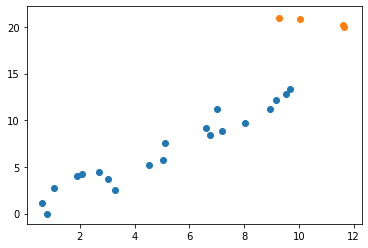

In [14]:
plt.scatter(xdata_real, ydata_real)
plt.scatter(xdata_out, ydata_out)

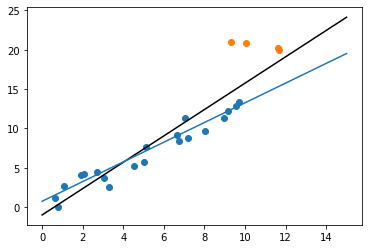

In [15]:
xall = np.concatenate([xdata_real, xdata_out])
yall = np.concatenate([ydata_real, ydata_out])
poly = np.polyfit(xall, yall, 1)
plt.scatter(xdata_real, ydata_real)
plt.scatter(xdata_out, ydata_out)
xvals = np.linspace(0., 15, 16)
plt.plot(xvals, np.polyval(poly, xvals), c='k')
plt.plot(xvals, np.polyval((slope_real, intercept_real), xvals))

In [16]:
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.tools import add_constant as smac

In [17]:
rlm_model = RLM(endog=yall, exog=smac(xall))
rlm_fit = rlm_model.fit()

In [18]:
rlm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:                            RLM   Df Residuals:                       22
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 29 Jan 2020                                         
Time:                        12:52:46                                         
No. Iterations:                    16                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7941      0.852     -0.932      0.351      -2.464       0.876
x1             1.6013      0.122     13.130      0.000       1.362       1.840
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

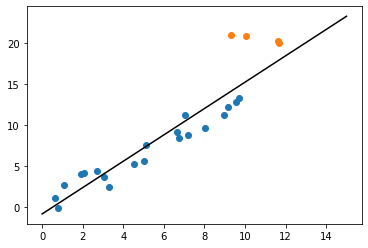

In [19]:
plt.scatter(xdata_real, ydata_real)
plt.scatter(xdata_out, ydata_out)
xvals = np.linspace(0., 15, 16)
plt.plot(xvals, rlm_fit.predict(smac(xvals)), c='k')

### Bayes

Think about how to create a model that understands (or learns) the nature of the outliers. We may come back to this...